In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
pwd

'C:\\Users\\hp'

In [3]:
cd Downloads

C:\Users\hp\Downloads


In [4]:
data = pd.read_csv('agri_workers_disease.csv')

In [5]:
data

,Age,YearsInField,ExposureLevel,ProtectiveGear,SmokingStatus,Disease
0,25,3,2,Yes,No,0
1,40,10,3,No,Yes,1
2,30,5,1,Yes,No,0
3,50,20,3,No,Yes,1
4,28,4,2,Yes,No,0
5,45,15,3,No,Yes,1
6,35,7,2,Yes,No,0
7,55,25,3,No,Yes,1
8,32,6,1,Yes,No,0
9,48,18,3,No,Yes,1


In [7]:
import matplotlib.pyplot as plt

In [8]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Age               0
YearsInField      0
ExposureLevel     0
ProtectiveGear    0
SmokingStatus     0
Disease           0
dtype: int64


In [9]:
data = data.dropna()

In [10]:
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [11]:
X = data.drop('Disease', axis=1)
y = data['Disease']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [15]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1 0]
 [0 1]]


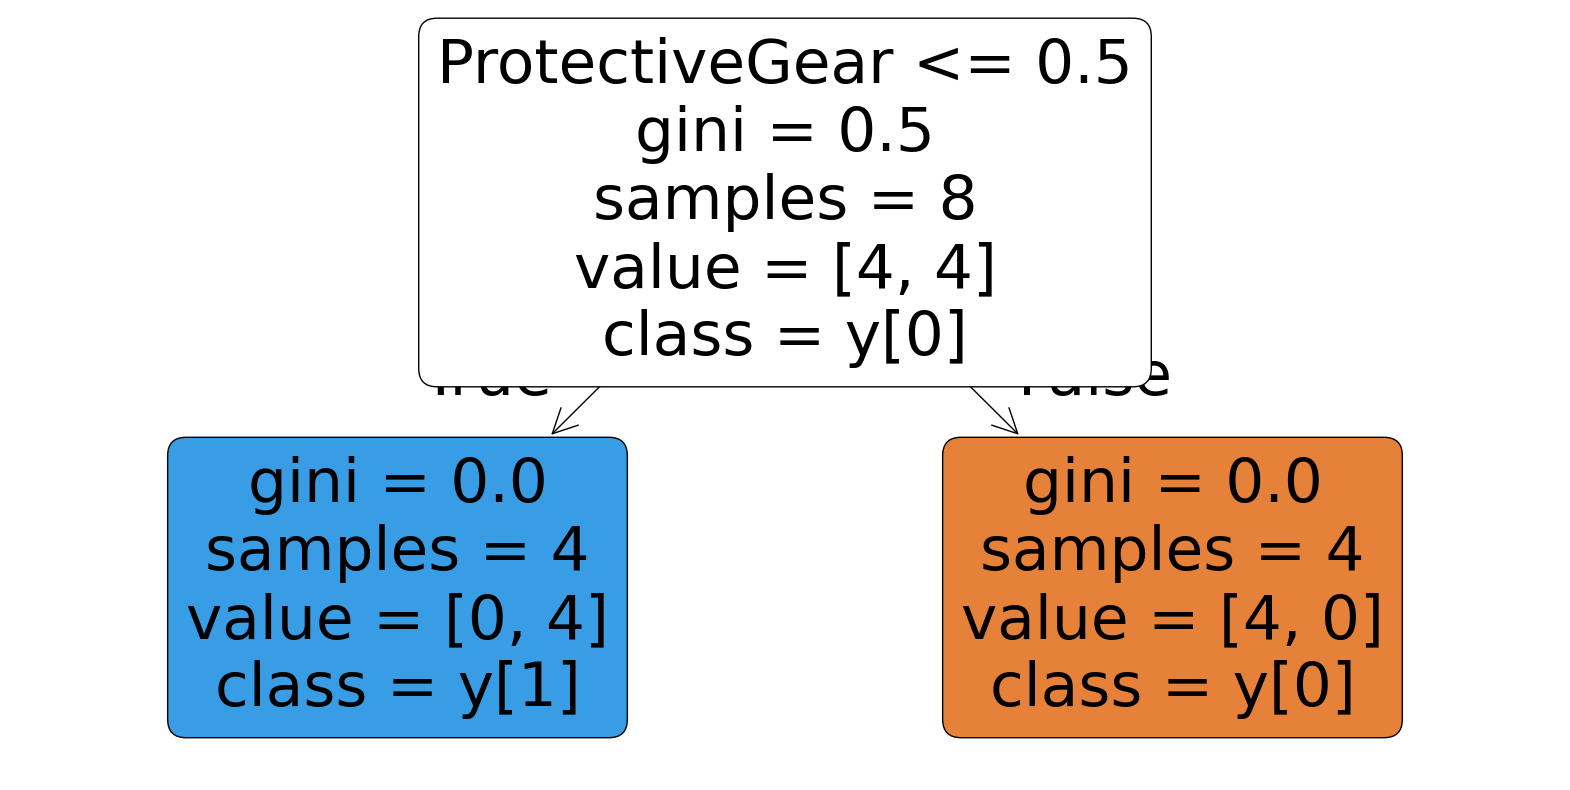

In [16]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.show()